<a href="https://colab.research.google.com/github/SanghamitraOjha/Google-stock-Price-Prediction-/blob/main/Google_stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predict stock prices with Long short-term memory (LSTM)

This simple example will show you how LSTM models predict time series data. Stock market data is a great choice for this because it's quite regular and widely available via the Internet.

Install Requirements

In [ ]:
!pip install --upgrade pip

In [ ]:
!pip install pandas-datareader

In [ ]:
!apt install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.42.2-3build2).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [ ]:
!pip install pydot pydot-ng

Introduction

LSTMs are very powerful in sequence prediction problems. They can store past information.

Loading the dataset

I use pandasdatareader to get the historical stock prices from Yahoo!finance

For this example, I get only the historical data till the end of training_end_data.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

 RECURRENT NEURAL NETWORK

Part 1 Data Processing

Importing the training set

In [ ]:
dataset_train = pd.read_csv('/content/drive/MyDrive/Google_Stock_Price_Train.csv')

In [ ]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,01-03-2012,325.25,332.83,324.97,663.59,"73,80,500"
1,01-04-2012,331.27,333.87,329.08,666.45,"57,49,400"
2,01-05-2012,329.83,330.75,326.89,657.21,"65,90,300"
3,01-06-2012,328.34,328.77,323.68,648.24,"54,05,900"
4,01-09-2012,322.04,322.29,309.46,620.76,"1,16,88,800"


In [ ]:
trainning_set = dataset_train.iloc[:,1:2].values
trainning_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

FEATURE SCALING


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
trainning_set_scaled = sc.fit_transform(trainning_set)

In [ ]:
trainning_set.shape

(1258, 1)

Creating a Data structure with 60 time steps and one out put

In [ ]:
x_train = []
y_train = []
for i in range(60,1258):
  x_train.append(trainning_set_scaled[i-60:i,0])
  y_train.append(trainning_set_scaled[i,0])

x_train, y_train = np.array(x_train),np.array(y_train)

Reshaping

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

Part - 2

BUILDING AND TRAINNING THE RNN

Importing the keras libraries and packages

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Initialisaing the RNN

In [ ]:
regressor = Sequential()

Adding the 1st LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))

Adding the 2nd LSTM layer and some Dropout regularisation



In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

Adding the 3rd LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

Adding the 4th LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

Adding the output layer

In [ ]:
regressor.add(Dense(units = 1))

Compiling the RNN

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

Fitting the RNN to the Trainning set

In [ ]:
regressor.fit(x_train,y_train, epochs = 100, batch_size= 32)

Epoch 1/100
38/38 [==============================] - 5s 131ms/step - loss: 0.0282
Epoch 2/100
38/38 [==============================] - 7s 185ms/step - loss: 0.0060
Epoch 3/100
38/38 [==============================] - 6s 161ms/step - loss: 0.0049
Epoch 4/100
38/38 [==============================] - 6s 172ms/step - loss: 0.0050
Epoch 5/100
38/38 [==============================] - 5s 139ms/step - loss: 0.0049
Epoch 6/100
38/38 [==============================] - 5s 132ms/step - loss: 0.0053
Epoch 7/100
38/38 [==============================] - 7s 186ms/step - loss: 0.0048
Epoch 8/100
38/38 [==============================] - 5s 131ms/step - loss: 0.0048
Epoch 9/100
38/38 [==============================] - 6s 160ms/step - loss: 0.0055
Epoch 10/100
38/38 [==============================] - 6s 152ms/step - loss: 0.0043
Epoch 11/100
38/38 [==============================] - 5s 132ms/step - loss: 0.0045
Epoch 12/100
38/38 [==============================] - 7s 185ms/step - loss: 0.0041
Epoch 13/100


In [ ]:
pred= regressor.predict(x_train)

38/38 [==============================] - 3s 33ms/step


Evaluating the RNN

In [ ]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(y_train,pred))
rmse

0.4889737599312275

Part - 3

MAKING THE PREDICTIONS AND VISUALISING THE RESULTS

Getting the real stock price of 2017

In [ ]:
dataset_test = pd.read_csv('/content/drive/MyDrive/Google_Stock_Price_Test.csv2017')
real_stock_price = dataset_test.iloc[:, 1:2].values

Getting the predicted stock price of 2017

In [ ]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis= 0 )
inputs = dataset_total[len(dataset_total)-len(dataset_test)- 60:].values
inputs = inputs. reshape(-1,1)
inputs = sc .transform(inputs)
X_test = []
for i in range (60,80):
   X_test.append(inputs[i-60:i, 0])
X_test = np.array(x_train)
X_test = np.reshape(X_test,(X_test. shape[0],X_test.shape[1],1))

In [ ]:
predicted_stock_price=regressor.predict(X_test)

predicted_stock_price=sc.inverse_transform(predicted_stock_price)

38/38 [==============================] - 1s 38ms/step


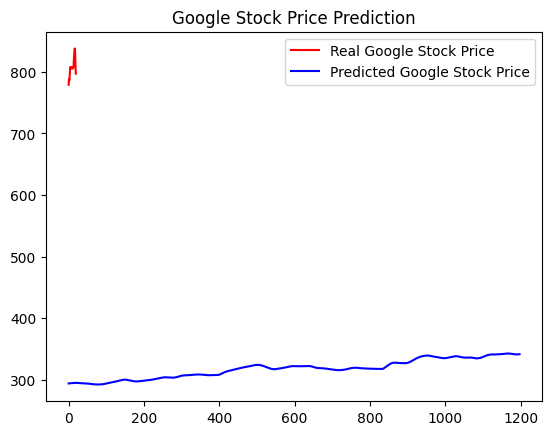

In [ ]:
plt.plot(real_stock_price,color='red',label = 'Real Google Stock Price' )
plt.plot(predicted_stock_price,color='blue',label = 'Predicted Google Stock Price' )
plt.title('Google Stock Price Prediction')
plt.xlabel=('Time')
plt.Ylabel=('Google Stock Price')
plt.legend()
plt.show()